# Recepie Review and User Feedback Dataset

# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

### 1: Business Understanding

Recipe Review Sentiment Analysis

Business Objective:
- Analyze sentiment from recipe reviews and ratings
- Extract insights about user satisfaction and feedback patterns
- Build predictive model for sentiment classification

Dataset Description:
- Source: Recipe reviews and ratings dataset
- Size: >18,000 reviews
- Key features: User reviews, ratings (1-5 stars), engagement metrics

Success Metrics:
1. Model Performance:
   - Classification accuracy >80%
   - Balanced precision/recall across sentiment classes
2. Business Value:
   - Identify patterns in user satisfaction
   - Extract actionable insights for recipe improvement
   - Understand factors influencing positive/negative reviews


### 2 Data Understanding

####  2.1 Dependecies

In [20]:
# Standard libraries for data manipulation
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Any

# Text processing 
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Download required NLTK data
nltk.download(['punkt', 'stopwords', 'vader_lexicon'])
nltk.download('punkt_tab')

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import SpatialDropout1D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling1D

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style="whitegrid", palette="dark") 

[nltk_data] Downloading package punkt to /home/sye729/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sye729/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sye729/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/sye729/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 2.2 Load the dataset

In [2]:
# Define paths
DATA_PATH = "../data/raw/Recipe Reviews and User Feedback Dataset.csv"
PROCESSED_PATH = "../data/processed/Task_3_processed/"
FIGURE_PATH = "../reports/figures/Task_3/"
EVAL_PATH = "../reports/model_evaluations/Task_3/"

# Load data
df = pd.read_csv(DATA_PATH)

#### 2.3  Display Basic Information

In [3]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst few rows:")
display(df.head())
print("\nLast few rows")
display(df.tail())

Dataset Shape: (18182, 15)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB

Missing Values:
Unnamed: 

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...



Last few rows


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


#### 2.4 Basica Statistics

In [4]:
# Generate basic statistics for numerical columns
print("Statistical Summary:")
print(df.describe())

# Display value counts for ratings
print("\nRating Distribution:")
print(df['stars'].value_counts().sort_index())

Statistical Summary:
         Unnamed: 0  recipe_number    recipe_code  user_reputation  \
count  18182.000000   18182.000000   18182.000000     18182.000000   
mean     121.465295      38.689363   21773.667253         2.159608   
std      116.747893      29.786647   23965.109637        10.014666   
min        0.000000       1.000000     386.000000         0.000000   
25%       45.000000      12.000000    6086.000000         1.000000   
50%       91.000000      33.000000   14600.000000         1.000000   
75%      150.000000      64.000000   33121.000000         1.000000   
max      724.000000     100.000000  191775.000000       520.000000   

         created_at   reply_count     thumbs_up   thumbs_down         stars  \
count  1.818200e+04  18182.000000  18182.000000  18182.000000  18182.000000   
mean   1.623710e+09      0.014630      1.089264      0.549335      4.288802   
std    5.468697e+06      0.137974      4.201004      3.470124      1.544786   
min    1.613035e+09      0.00000

#### 2.5 Exploratory Data Analysis

##### 2.5.1 Star Ratin Distribution

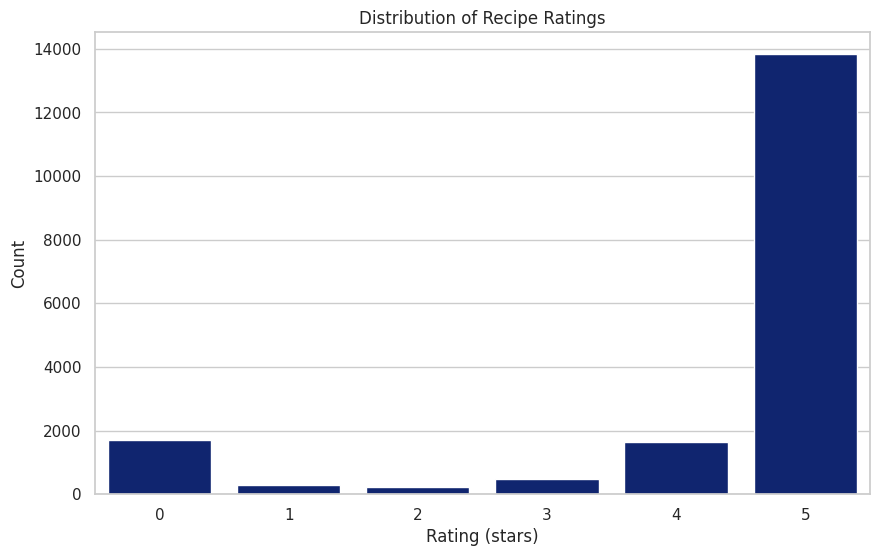

In [5]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stars')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/rating_distribution.png')
plt.show()

##### 2.5.2 Text Analysis

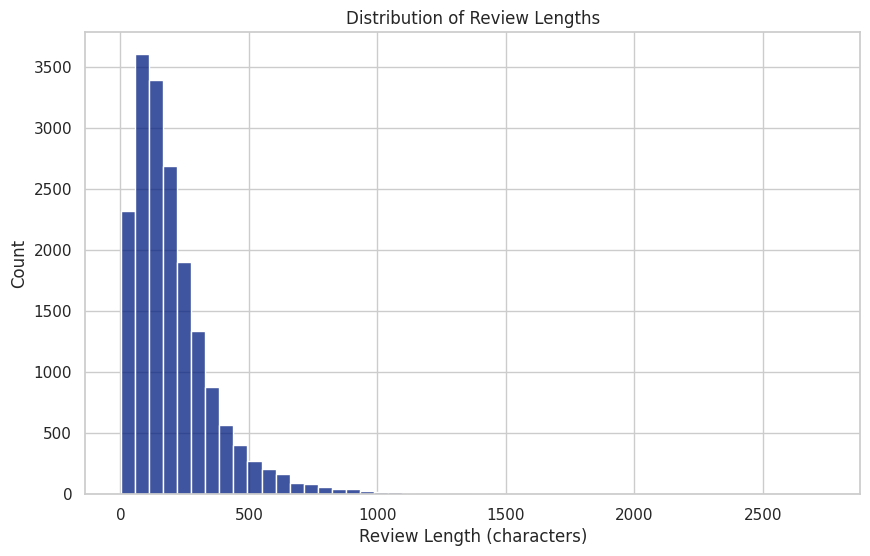


Review Length Statistics:
count    18180.000000
mean       203.909681
std        172.455624
min          1.000000
25%         90.000000
50%        161.000000
75%        266.000000
max       2742.000000
Name: text_length, dtype: float64


In [6]:
# Add text length feature
df['text_length'] = df['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/text_length_distribution.png')
plt.show()

# Print text length statistics
print("\nReview Length Statistics:")
print(df['text_length'].describe())

##### 2.5.3 User Enagament

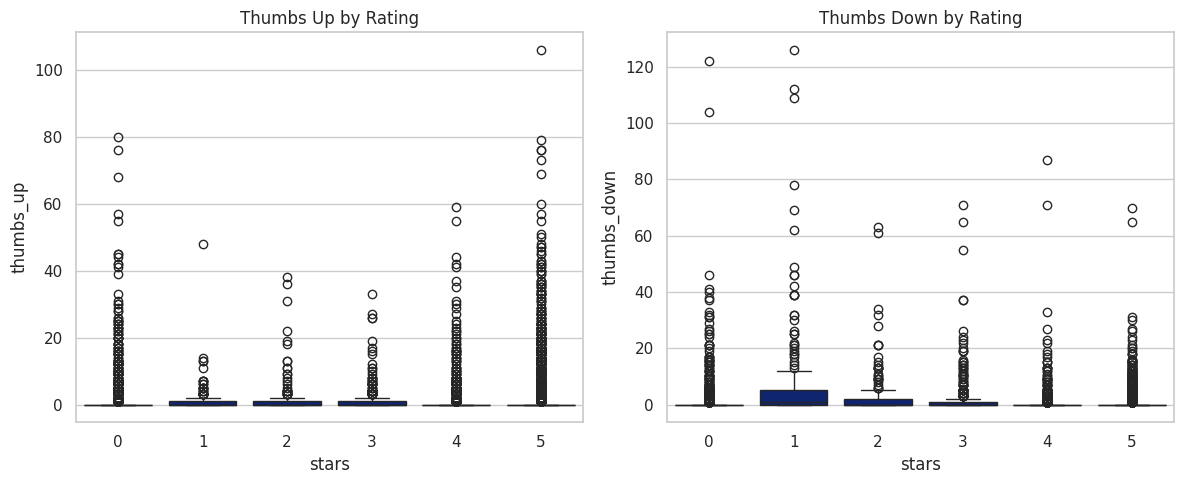

In [7]:
# Create engagement visualization
plt.figure(figsize=(12, 5))

# Thumbs up/down by rating
plt.subplot(121)
sns.boxplot(data=df, x='stars', y='thumbs_up')
plt.title('Thumbs Up by Rating')

plt.subplot(122)
sns.boxplot(data=df, x='stars', y='thumbs_down')
plt.title('Thumbs Down by Rating')

plt.tight_layout()
plt.savefig(f'{FIGURE_PATH}/engagement_by_rating.png')
plt.show()

### 3. Data Preparation
#### 3.1 Data Cleaning and Filtering
- Remove 0 ratings (no feedback)
- Handle missing values in text
- Clean text data (remove special characters, URLs, etc.)

In [8]:
# 3.1 Data Cleaning and Filtering
import pickle


def clean_and_prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and prepare data for modeling.
    """
    # Remove 0 ratings
    df_cleaned = df[df['stars'] > 0].copy()
    
    # Clean text
    df_cleaned['cleaned_text'] = df_cleaned['text'].apply(lambda x: 
        clean_text(x) if pd.notna(x) else '')
    
    # Convert ratings to sentiment
    df_cleaned['sentiment'] = df_cleaned['stars'].apply(lambda x:
        'negative' if x <= 2
        else 'neutral' if x == 3
        else 'positive'
    )
    
    # Remove empty texts
    df_cleaned = df_cleaned[df_cleaned['cleaned_text'].str.len() > 0]
    
    return df_cleaned

def clean_text(text: str) -> str:
    """
    Clean text data.
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# 3.2 Feature Engineering
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create additional features.
    """
    # Text length features
    df['text_length'] = df['cleaned_text'].str.len()
    df['word_count'] = df['cleaned_text'].str.split().str.len()
    
    # Normalize engagement metrics
    df['normalized_thumbs_up'] = df['thumbs_up'] / df['thumbs_up'].max()
    df['normalized_thumbs_down'] = df['thumbs_down'] / df['thumbs_down'].max()
    
    return df

# 3.3 Text Preprocessing
def preprocess_text(df: pd.DataFrame, max_len: int = 266) -> Tuple[np.ndarray, Tokenizer]:
    """
    Preprocess text for modeling.
    """
    # Initialize tokenizer
    tokenizer = Tokenizer(num_words=10000)  # Based on vocabulary size analysis
    tokenizer.fit_on_texts(df['cleaned_text'])
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
    
    # Pad sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    
    return padded_sequences, tokenizer

# Execute data preparation
df_cleaned = clean_and_prepare_data(df)
df_features = engineer_features(df_cleaned)
X_padded, tokenizer = preprocess_text(df_features)

# Display class distribution
print("Sentiment Distribution:")
print(df_features['sentiment'].value_counts())
print("\nShape of padded sequences:", X_padded.shape)

# Save processed data
df_features.to_csv(f"{PROCESSED_PATH}/processed_data.csv", index=False)
with open(f"{PROCESSED_PATH}/tokenizer.pkl", 'wb') as f:
    pickle.dump(tokenizer, f)

Sentiment Distribution:
sentiment
positive    15470
negative      512
neutral       489
Name: count, dtype: int64

Shape of padded sequences: (16471, 266)


### 3.2 Feature Engineering
- Convert ratings to sentiment categories:
  * 1-2 stars → Negative
  * 3 stars → Neutral
  * 4-5 stars → Positive
- Create text length features
- Normalize user engagement metrics

In [9]:
# 3.4 Advanced Feature Engineering
def create_advanced_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create advanced features using VADER and additional metrics.
    """
    # Initialize VADER
    sid = SentimentIntensityAnalyzer()
    
    # Add VADER sentiment scores
    df['vader_scores'] = df['cleaned_text'].apply(lambda x: 
        sid.polarity_scores(x))
    df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
    df['vader_pos'] = df['vader_scores'].apply(lambda x: x['pos'])
    df['vader_neg'] = df['vader_scores'].apply(lambda x: x['neg'])
    
    # User reputation features
    df['is_frequent_reviewer'] = df['user_reputation'] > df['user_reputation'].median()
    
    # Drop intermediate column
    df = df.drop('vader_scores', axis=1)
    
    return df

# 3.5 Handle Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def balance_dataset(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Balance dataset using SMOTE.
    """
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    print("Original dataset shape:", dict(zip(*np.unique(y, return_counts=True))))
    print("Resampled dataset shape:", dict(zip(*np.unique(y_resampled, return_counts=True))))
    
    return X_resampled, y_resampled

def calculate_class_weights(y: np.ndarray) -> Dict:
    """
    Calculate class weights for balanced model training.
    """
    class_counts = np.bincount(y)
    total = len(y)
    class_weights = {i: total / (len(class_counts) * count) 
                    for i, count in enumerate(class_counts)}
    return class_weights

# 3.6 Final Dataset Preparation
def prepare_final_dataset(df: pd.DataFrame, X_text: np.ndarray) -> Tuple:
    """
    Prepare final dataset for modeling.
    """
    # Prepare features
    numerical_features = ['normalized_thumbs_up', 'normalized_thumbs_down',
                         'vader_compound', 'vader_pos', 'vader_neg',
                         'text_length', 'word_count']
    
    # Scale numerical features
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(df[numerical_features])
    
    # Combine features
    X_combined = np.hstack([X_text, X_numerical])
    
    # Encode target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['sentiment'])
    
    # Split dataset
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_combined, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Balance training data
    X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)
    
    # Calculate class weights
    class_weights = calculate_class_weights(y_train)
    
    return (X_train_balanced, X_val, X_test,
            y_train_balanced, y_val, y_test,
            class_weights, label_encoder, scaler)

# Execute advanced preparation steps
print("Creating advanced features...")
df_advanced = create_advanced_features(df_features)

print("\nPreparing final dataset...")
(X_train, X_val, X_test,
 y_train, y_val, y_test,
 class_weights, label_encoder, scaler) = prepare_final_dataset(
    df_advanced, X_padded)

# Save processed artifacts
print("\nSaving processed data...")
np.save(f"{PROCESSED_PATH}/X_train.npy", X_train)
np.save(f"{PROCESSED_PATH}/X_val.npy", X_val)
np.save(f"{PROCESSED_PATH}/X_test.npy", X_test)
np.save(f"{PROCESSED_PATH}/y_train.npy", y_train)
np.save(f"{PROCESSED_PATH}/y_val.npy", y_val)
np.save(f"{PROCESSED_PATH}/y_test.npy", y_test)

# Save preprocessing objects
with open(f"{PROCESSED_PATH}/preprocessing_objects.pkl", 'wb') as f:
    pickle.dump({
        'label_encoder': label_encoder,
        'scaler': scaler,
        'class_weights': class_weights
    }, f)

print("\nFeature Summary:")
print(f"Text features shape: {X_padded.shape}")
print(f"Total features: {X_train.shape[1]}")
print("\nClass distribution after balancing:")
print(pd.Series(y_train).value_counts().sort_index())

Creating advanced features...

Preparing final dataset...
Original dataset shape: {np.int64(0): np.int64(359), np.int64(1): np.int64(342), np.int64(2): np.int64(10828)}
Resampled dataset shape: {np.int64(0): np.int64(10828), np.int64(1): np.int64(10828), np.int64(2): np.int64(10828)}

Saving processed data...

Feature Summary:
Text features shape: (16471, 266)
Total features: 273

Class distribution after balancing:
0    10828
1    10828
2    10828
Name: count, dtype: int64


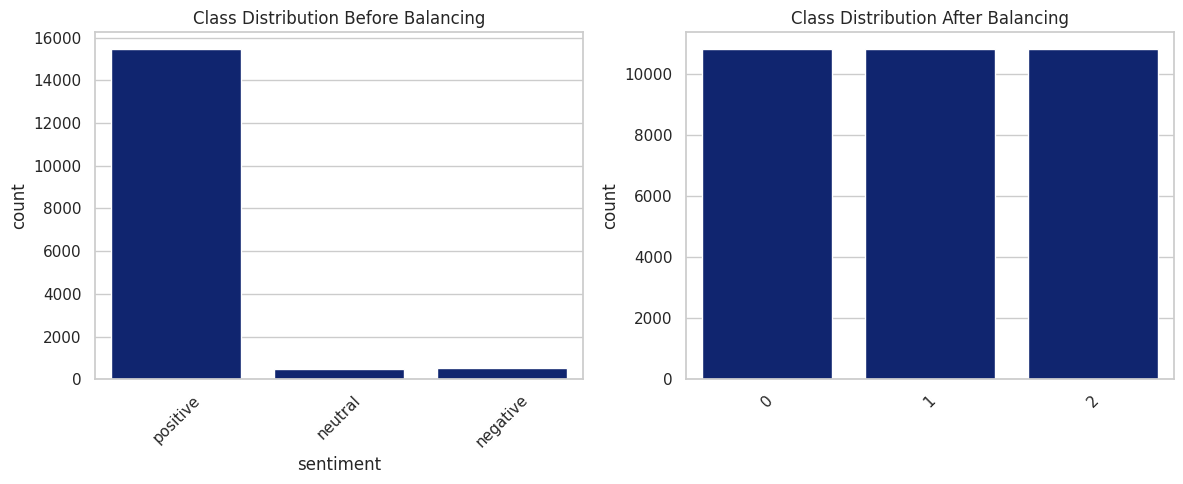

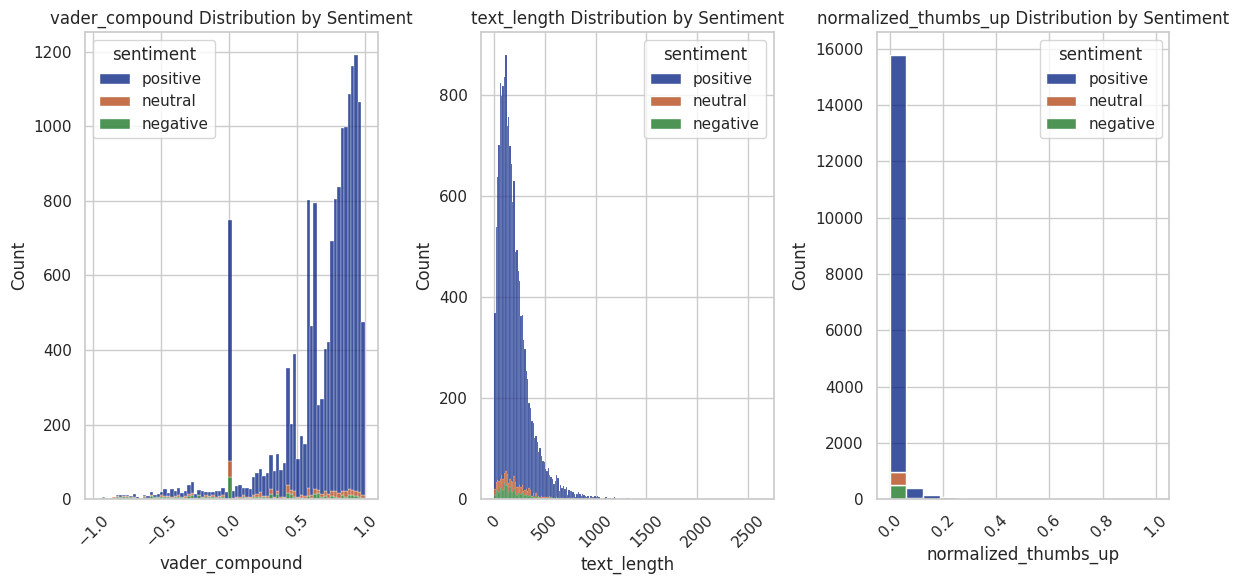

In [10]:
# Visualize class balance before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.countplot(data=df_advanced, x='sentiment')
plt.title('Class Distribution Before Balancing')
plt.xticks(rotation=45)

plt.subplot(122)
sns.countplot(x=y_train)
plt.title('Class Distribution After Balancing')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/class_balance_comparison.png")
plt.show()

# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['vader_compound', 'text_length', 'normalized_thumbs_up']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df_advanced, x=feature, hue='sentiment', multiple="stack")
    plt.title(f'{feature} Distribution by Sentiment')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/feature_distributions.png")
plt.show()

### 3.3 Text Preprocessing
- Tokenization
- Remove stopwords
- Handle common recipe-specific terms
- Sequence padding (based on 75th percentile length: 266 characters)

Starting text preprocessing...
Tokenizing texts...
Fitting tokenizer...
Padding sequences to length 266...

Preprocessing Statistics:
vocabulary_size: 14902.00
max_sequence_length: 266.00
average_sequence_length: 18.15
total_unique_words: 14898.00
samples_truncated: 0.00

Saving preprocessing artifacts...


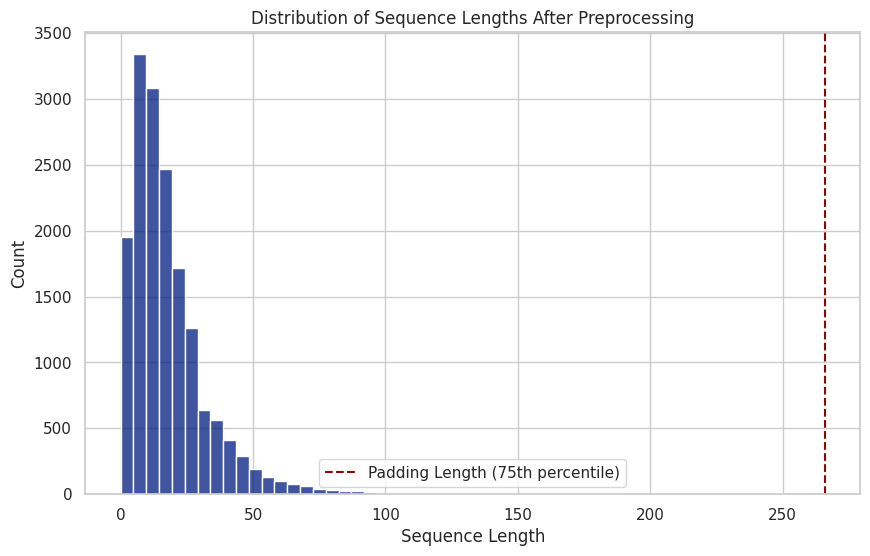


Most common words in the vocabulary:
         word  frequency
0        used       3999
1        good       3315
2   delicious       2903
3       great       2757
4       added       2657
5        easy       2617
6         one       2297
7      family       2285
8         use       2279
9        like       2161
10       also       2146
11      loved       2125
12       love       1781
13       cake       1754
14        add       1730
15    instead       1701
16       soup       1668
17    chicken       1570
18     really       1557
19     cheese       1555


In [11]:
# 3.3 Text Preprocessing
def preprocess_text_data(df: pd.DataFrame, max_length: int = 266) -> Tuple[np.ndarray, Tokenizer, Dict[str, Any]]:
    """
    Comprehensive text preprocessing pipeline.
    
    Args:
        df: DataFrame containing 'cleaned_text' column
        max_length: Maximum sequence length for padding (using 75th percentile)
    
    Returns:
        Tuple containing padded sequences, tokenizer, and preprocessing stats
    """
    print("Starting text preprocessing...")
    
    # 1. Define recipe-specific stopwords
    recipe_stopwords = {
        'recipe', 'recipes', 'cook', 'cooking', 'made', 'make', 'making',
        'food', 'dish', 'meal', 'ingredients', 'kitchen', 'minutes', 'hour',
        'hours', 'time'
    }
    stop_words = set(stopwords.words('english')).union(recipe_stopwords)
    
    # 2. Text cleaning and tokenization
    def clean_and_tokenize(text: str) -> List[str]:
        # Convert to lowercase and remove special characters
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # Remove stopwords and recipe-specific terms
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        
        # Remove numeric tokens and single characters
        tokens = [word for word in tokens if not word.isnumeric() and len(word) > 1]
        
        return tokens
    
    # Apply preprocessing to all texts
    print("Tokenizing texts...")
    df['tokenized_text'] = df['cleaned_text'].apply(clean_and_tokenize)
    
    # 3. Initialize and fit tokenizer
    print("Fitting tokenizer...")
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['tokenized_text'].apply(' '.join))
    
    # 4. Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['tokenized_text'].apply(' '.join))
    
    # 5. Pad sequences
    print(f"Padding sequences to length {max_length}...")
    padded_sequences = pad_sequences(
        sequences,
        maxlen=max_length,
        padding='post',
        truncating='post'
    )
    
    # Collect preprocessing statistics
    stats = {
        'vocabulary_size': len(tokenizer.word_index) + 1,
        'max_sequence_length': max_length,
        'average_sequence_length': np.mean([len(seq) for seq in sequences]),
        'total_unique_words': len(set([word for tokens in df['tokenized_text'] for word in tokens])),
        'samples_truncated': sum(len(seq) > max_length for seq in sequences)
    }
    
    print("\nPreprocessing Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")
    
    return padded_sequences, tokenizer, stats

# Execute text preprocessing
padded_sequences, tokenizer, preprocessing_stats = preprocess_text_data(df_cleaned)

# Save preprocessing artifacts
print("\nSaving preprocessing artifacts...")
with open(f"{PROCESSED_PATH}/text_preprocessing_artifacts.pkl", 'wb') as f:
    pickle.dump({
        'tokenizer': tokenizer,
        'preprocessing_stats': preprocessing_stats
    }, f)

# Visualize sequence lengths distribution
plt.figure(figsize=(10, 6))
sequence_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(df_cleaned['tokenized_text'].apply(' '.join))]
sns.histplot(sequence_lengths, bins=50)
plt.axvline(x=266, color='r', linestyle='--', label='Padding Length (75th percentile)')
plt.title('Distribution of Sequence Lengths After Preprocessing')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.legend()
plt.savefig(f"{FIGURE_PATH}/sequence_lengths_distribution.png")
plt.show()

# Display most common words
print("\nMost common words in the vocabulary:")
word_freq = pd.DataFrame(
    sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:20],
    columns=['word', 'frequency']
)
print(word_freq)

### 4. Model Architecture Design

#### 4.1 Base Model (LSTM)

In [50]:
def build_base_model(
    vocab_size: int,
    max_length: int,
    embedding_dim: int = 100,
    lstm_units: int = 128,
    n_classes: int = 3
) -> tf.keras.Model:
    """
    Build baseline LSTM model for sentiment analysis.
    
    Args:
        vocab_size: Size of vocabulary
        max_length: Maximum sequence length
        embedding_dim: Dimension of embedding layer
        lstm_units: Number of LSTM units
        n_classes: Number of output classes
    
    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # Embedding Layer
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        
        # LSTM Layers
        LSTM(lstm_units, return_sequences=True),
        Dropout(0.3),
        
        LSTM(lstm_units//2),
        Dropout(0.3),
        
        # Dense Layers
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

#### 4.2 Training Configuration

In [51]:
def setup_training_config(model_name: str = "base_lstm") -> Dict[str, Any]:
    """
    Configure training parameters and callbacks.
    
    Args:
        model_name: Name of the model for saving
        
    Returns:
        Dictionary containing training configuration
    """
    config = {
        # Training parameters
        'batch_size': 32,
        'epochs': 10,
        'validation_split': 0.2,
        
        # Callbacks
        'callbacks': [
            # Early stopping
            EarlyStopping(
                monitor='val_loss',
                patience=3,
                restore_best_weights=True
            ),
            # Model checkpoint
            ModelCheckpoint(
                f'../models/Task_3/{model_name}_best.keras',
                monitor='val_loss',
                save_best_only=True
            ),
            # Learning rate reduction
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=2,
                min_lr=1e-6
            )
        ]
    }
    
    return config

#### 4.3 Training Setup
Configure training parameters and create data splits.

In [52]:
def train_model(
    model: tf.keras.Model,
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    config: Dict[str, Any]
) -> Tuple[tf.keras.Model, Dict[str, list]]:
    """
    Train the model with given configuration.
    
    Args:
        model: Keras model to train
        X_train: Training features
        y_train: Training labels
        X_val: Validation features
        y_val: Validation labels
        config: Training configuration
        
    Returns:
        Tuple of (trained model, training history)
    """
    print("Starting model training...")
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=config['batch_size'],
        epochs=config['epochs'],
        callbacks=config['callbacks']
    )
    
    return model, history.history

#### 4.4 Training Visualization

In [53]:
def plot_training_history(history: Dict[str, list], save_path: str) -> None:
    """
    Plot training metrics history.
    
    Args:
        history: Training history dictionary
        save_path: Path to save visualization
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    ax1.plot(history['accuracy'], label='Training')
    ax1.plot(history['val_accuracy'], label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Loss plot
    ax2.plot(history['loss'], label='Training')
    ax2.plot(history['val_loss'], label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/training_history.png')
    plt.close()

#### 4.5 Model Training

In [54]:
# Build and train base model
print("Initializing base model training...")

# Get vocabulary size and sequence length from preprocessing
vocab_size = preprocessing_stats['vocabulary_size']
max_length = int(preprocessing_stats['max_sequence_length'])

# Build model
model = build_base_model(
    vocab_size=vocab_size,
    max_length=max_length,
    embedding_dim=100
)
model.summary()

# Setup training configuration
training_config = setup_training_config("base_lstm")

# Train model
trained_model, history = train_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    training_config
)

# Plot training history
plot_training_history(history, FIGURE_PATH)

# Save training history
with open(f'{PROCESSED_PATH}/base_model_history.pkl', 'wb') as f:
    pickle.dump(history, f)

print("Base model training completed!")

Initializing base model training...


/mnt/c/Users/geova/project/gpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Starting model training...
Epoch 1/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 53s 49ms/step - accuracy: 0.4741 - loss: 1.0153 - val_accuracy: 0.9320 - val_loss: 0.9924 - learning_rate: 0.0010
Epoch 2/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.3393 - loss: 1.0991 - val_accuracy: 0.8337 - val_loss: 1.0205 - learning_rate: 0.0010
Epoch 3/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.5257 - loss: 0.9780 - val_accuracy: 0.8434 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 4/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.5386 - loss: 0.9462 - val_accuracy: 0.8130 - val_loss: 0.8356 - learning_rate: 0.0010
Epoch 5/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.5454 - loss: 0.9303 - val_accuracy: 0.8167 - val_loss: 0.8014 - learning_rate: 0.0010
Epoch 6/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.5570 - loss: 0.9189 - val_accuracy: 0.8191 - val_loss: 0.7994 - learning_rate: 1.0000e-04
Base model training completed!


### 4.6 Advanced Model (RoBERTa) 


### 5 Model Evaluation

#### 5.1 Evaluation

In [56]:
import json


def evaluate_model(
    model: tf.keras.Model,
    X_test: np.ndarray,
    y_test: np.ndarray,
    save_path: str
) -> Dict[str, Any]:
    """
    Evaluate model performance on test set.
    
    Args:
        model: Trained Keras model
        X_test: Test features
        y_test: Test labels
        save_path: Path to save evaluation results
        
    Returns:
        Dictionary containing evaluation metrics
    """
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    
    # Create confusion matrix plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'{save_path}/confusion_matrix.png')
    plt.close()
    
    # Per-class metrics plot
    plt.figure(figsize=(12, 6))
    # Create DataFrame only with class metrics (excluding averages)
    metrics_df = pd.DataFrame({
        key: values for key, values in report.items() 
        if key not in ['accuracy', 'macro avg', 'weighted avg']
    })
    
    # Plot class metrics
    metrics_plot = metrics_df.T[['precision', 'recall', 'f1-score']].plot(kind='bar')
    plt.title('Per-Class Performance Metrics')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{save_path}/per_class_metrics.png')
    plt.close()
    
    # Save detailed results
    evaluation_results = {
        'classification_report': report,
        'confusion_matrix': conf_matrix.tolist(),
        'test_accuracy': report['accuracy'],
        'macro_f1': report['macro avg']['f1-score']
    }
    
    with open(f'{save_path}/evaluation_results.json', 'w') as f:
        json.dump(evaluation_results, f, indent=4)
    
    return evaluation_results

# Run evaluation
print("Evaluating model performance...")
eval_results = evaluate_model(
    trained_model,
    X_test,
    y_test,
    EVAL_PATH
)

# Print summary results
print("\nTest Set Performance:")
print(f"Accuracy: {eval_results['test_accuracy']:.4f}")
print(f"Macro F1: {eval_results['macro_f1']:.4f}")

# Print per-class metrics
print("\nPer-Class Performance:")
for class_name, metrics in eval_results['classification_report'].items():
    if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"\nClass {class_name}:")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1-score']:.4f}")

Evaluating model performance...
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Test Set Performance:
Accuracy: 0.8430
Macro F1: 0.4263

Per-Class Performance:

Class 0:
Precision: 0.1955
Recall: 0.4545
F1-Score: 0.2734

Class 1:
Precision: 0.0598
Recall: 0.1507
F1-Score: 0.0856

Class 2:
Precision: 0.9663
Recall: 0.8776
F1-Score: 0.9198


<Figure size 1200x600 with 0 Axes>

#### 5.1 Vizualize model results

In [57]:
def visualize_model_results(
    history: Dict[str, list],
    eval_results: Dict[str, Any],
    save_path: str
) -> None:
    """
    Create comprehensive visualizations of model training and evaluation results.
    
    Args:
        history: Training history dictionary
        eval_results: Evaluation results from test set
        save_path: Path to save visualizations
    """
    # 1. Training History Plot
    plt.figure(figsize=(15, 5))
    
    # Accuracy subplot
    plt.subplot(121)
    plt.plot(history['accuracy'], label='Training', marker='o')
    plt.plot(history['val_accuracy'], label='Validation', marker='o')
    plt.title('Model Accuracy Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Loss subplot
    plt.subplot(122)
    plt.plot(history['loss'], label='Training', marker='o')
    plt.plot(history['val_loss'], label='Validation', marker='o')
    plt.title('Model Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/training_history_detailed.png')
    plt.close()
    
    # 2. Confusion Matrix Heatmap
    plt.figure(figsize=(10, 8))
    conf_matrix = np.array(eval_results['confusion_matrix'])
    
    # Create normalized confusion matrix
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(conf_matrix_norm, annot=conf_matrix, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f'{save_path}/confusion_matrix_detailed.png')
    plt.close()
    
    # 3. Per-Class Performance Metrics
    plt.figure(figsize=(12, 6))
    metrics = ['precision', 'recall', 'f1-score']
    class_metrics = {
        class_name: [eval_results['classification_report'][class_name][metric] 
                    for metric in metrics]
        for class_name in ['0', '1', '2']  # Assuming classes are 0, 1, 2
    }
    
    df_metrics = pd.DataFrame(class_metrics, index=metrics).T
    df_metrics.plot(kind='bar', width=0.8)
    plt.title('Performance Metrics by Class')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.legend(title='Metric')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{save_path}/class_performance_detailed.png')
    plt.close()
    
    # 4. Learning Curves
    if 'learning_rate' in history:
        plt.figure(figsize=(10, 5))
        plt.plot(history['learning_rate'], marker='o')
        plt.title('Learning Rate Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.grid(True)
        plt.savefig(f'{save_path}/learning_rate.png')
        plt.close()
    
    # Print summary statistics
    print("\nModel Performance Summary:")
    print("-" * 50)
    print(f"Final Training Accuracy: {history['accuracy'][-1]:.4f}")
    print(f"Final Validation Accuracy: {history['val_accuracy'][-1]:.4f}")
    print(f"Test Set Accuracy: {eval_results['test_accuracy']:.4f}")
    print(f"Macro F1 Score: {eval_results['macro_f1']:.4f}")
    
    # Per-class performance
    print("\nPer-Class Performance:")
    print("-" * 50)
    for class_name in ['0', '1', '2']:
        metrics = eval_results['classification_report'][class_name]
        print(f"\nClass {class_name}:")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1-score']:.4f}")

# Run visualization
visualize_model_results(
    history,  # Your training history
    eval_results,  # Your evaluation results
    FIGURE_PATH
)


Model Performance Summary:
--------------------------------------------------
Final Training Accuracy: 0.5634
Final Validation Accuracy: 0.8191
Test Set Accuracy: 0.8430
Macro F1 Score: 0.4263

Per-Class Performance:
--------------------------------------------------

Class 0:
Precision: 0.1955
Recall: 0.4545
F1-Score: 0.2734

Class 1:
Precision: 0.0598
Recall: 0.1507
F1-Score: 0.0856

Class 2:
Precision: 0.9663
Recall: 0.8776
F1-Score: 0.9198


<Figure size 1200x600 with 0 Axes>